<a href="https://colab.research.google.com/github/BurakKizilkaya/Machine-Learning-Final-Project/blob/master/forest_fire_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Fire Detection

##Keras Framework

###Dataset and Required Pacakge Loading

In [0]:
#uploading data

from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
!cp '/content/gdrive/My Drive/Colab Notebooks/forest_dataset.zip' '/content/'


In [0]:
!unzip forest_dataset.zip

Archive:  forest_dataset.zip
   creating: forest_images/
   creating: forest_images/nonfire/
  inflating: forest_images/nonfire/nf1 (635).jpg  
  inflating: forest_images/nonfire/nf1 (634).jpg  
  inflating: forest_images/nonfire/nf1 (630).jpg  
  inflating: forest_images/nonfire/nf1 (629).jpg  
  inflating: forest_images/nonfire/nf1 (628).jpg  
  inflating: forest_images/nonfire/nf1 (627).jpg  
  inflating: forest_images/nonfire/nf1 (624).jpg  
  inflating: forest_images/nonfire/nf1 (623).jpg  
  inflating: forest_images/nonfire/nf1 (622).jpg  
  inflating: forest_images/nonfire/nf1 (621).jpg  
  inflating: forest_images/nonfire/nf1 (620).jpg  
  inflating: forest_images/nonfire/nf1 (619).jpg  
  inflating: forest_images/nonfire/nf1 (618).jpg  
  inflating: forest_images/nonfire/nf1 (616).jpg  
  inflating: forest_images/nonfire/nf1 (614).jpg  
  inflating: forest_images/nonfire/nf1 (613).jpg  
  inflating: forest_images/nonfire/nf1 (611).jpg  
  inflating: forest_images/nonfire/nf1 (

In [0]:
# Using Keras Sequential Model

#import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator



###Model Genearation

In [0]:
cnn = Sequential()

In [0]:

#Adding 1st Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),input_shape = (64, 64, 3), activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

#Adding 2nd Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3),activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

#Adding 3rd Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

#Adding 4th Convolution and Pooling Layer
cnn.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

#Flattening
cnn.add(Flatten())

cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dense(units = 1, activation = 'sigmoid'))

#compile the model
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# data generation from images
pdatagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
udatagen = ImageDataGenerator(rescale=1./255)
train = pdatagen.flow_from_directory('forest_images', target_size=(64,64), batch_size=32, class_mode = 'binary')
test = udatagen.flow_from_directory('forest_images', target_size=(64,64), batch_size=32, class_mode = 'binary')

Found 3400 images belonging to 2 classes.
Found 3400 images belonging to 2 classes.


In [0]:
# train the model on data 
acc = cnn.fit_generator(train, steps_per_epoch = 100, epochs = 30, validation_data = test, validation_steps = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 102s 1s/step - loss: 0.2752 - acc: 0.8831 - val_loss: 0.1429 - val_acc: 0.9456
Epoch 2/30
100/100 [==============================] - 96s 963ms/step - loss: 0.0906 - acc: 0.9687 - val_loss: 0.0571 - val_acc: 0.9800
Epoch 3/30
100/100 [==============================] - 97s 967ms/step - loss: 0.0960 - acc: 0.9678 - val_loss: 0.0429 - val_acc: 0.9854
Epoch 4/30
100/100 [==============================] - 96s 964ms/step - loss: 0.0497 - acc: 0.9831 - val_loss: 0.0313 - val_acc: 0.9881
Epoch 5/30
100/100 [==============================] - 96s 955ms/step - loss: 0.0375 - acc: 0.9841 - val_loss: 0.0585 - val_acc: 0.9778
Epoch 6/30
100/100 [==============================] - 97s 970ms/step - loss: 0.0414 - acc: 0.9841 - val_loss: 0.0404 - val_acc: 0.9838
Epoch 7/30
100/100 [==============================] - 95s 951ms/step - loss: 0.0305 - acc: 0.9894 - val_loss: 0.0582 - val_acc: 0.9797
Epoch 8/3

In [0]:
cnn.save('model.cnn')
!cp 'model.cnn' '/content/gdrive/My Drive/Colab Notebooks/' 



In [0]:
#forest with fire

from keras.models import load_model
import cv2
import numpy as np

model = load_model('/content/gdrive/My Drive/Colab Notebooks/model.cnn')

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

img = cv2.imread('61290319_2346694842055814_257114510618263552_n.jpg')
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])

classes = model.predict_classes(img)

print(classes)

[[0]]


In [0]:
# forest with no fire

from keras.models import load_model
import cv2
import numpy as np

model = load_model('/content/gdrive/My Drive/Colab Notebooks/model.cnn')

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

img = cv2.imread('forest-grass-nature-158251.jpg')
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])

classes = model.predict_classes(img)

print(classes)

[[1]]


In [0]:
# forest with fire

from keras.models import load_model
import cv2
import numpy as np

model = load_model('/content/gdrive/My Drive/Colab Notebooks/model.cnn')

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

img = cv2.imread('2015-07-13-fire.jpg')
img = cv2.resize(img,(64,64))
img = np.reshape(img,[1,64,64,3])

classes = model.predict_classes(img)

print(classes)

[[0]]


In [0]:
# RESNET50 from keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras import optimizers
import numpy as np

model = Sequential()

model.add(ResNet50(weights='imagenet'))
model.add(Dense(1, activation = 'relu'))

# dont train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

# data generation from forest images
traindatagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
testdatagen = ImageDataGenerator(rescale=1./255)
train = traindatagen.flow_from_directory('forest_images', target_size=(224,224), batch_size=32, class_mode = 'binary')
test = testdatagen.flow_from_directory('forest_images', target_size=(224,224), batch_size=32, class_mode = 'binary')


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 3s 0us/step
Found 3400 images belonging to 2 classes.
Found 3400 images belonging to 2 classes.


In [0]:
acc = model.fit_generator(train, steps_per_epoch = 100, epochs = 30, validation_data = test, validation_steps = 50)


Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 1471s 15s/step - loss: 2.4125 - acc: 0.3256 - val_loss: 2.0494 - val_acc: 0.3212
Epoch 2/30
100/100 [==============================] - 1434s 14s/step - loss: 1.7814 - acc: 0.3319 - val_loss: 1.7368 - val_acc: 0.3294
Epoch 3/30
100/100 [==============================] - 1440s 14s/step - loss: 1.5868 - acc: 0.3228 - val_loss: 1.5760 - val_acc: 0.3204
Epoch 4/30
100/100 [==============================] - 1437s 14s/step - loss: 1.4234 - acc: 0.3294 - val_loss: 1.4157 - val_acc: 0.3369
Epoch 5/30
100/100 [==============================] - 1444s 14s/step - loss: 1.3213 - acc: 0.3247 - val_loss: 1.3171 - val_acc: 0.3369
Epoch 6/30
100/100 [==============================] - 1478s 15s/step - loss: 1.2349 - acc: 0.3222 - val_loss: 1.2821 - val_acc: 0.3088
Epoch 7/30
100/100 [==============================] - 1476s 15s/step - loss: 1.1622 - acc: 0.3206 - val_loss: 1.1636 - val_acc: 0.3420
Epoch 8

##PyTorch Framework

###Dataset and Required Package Loading

This part loads a zip file that contains Dataset folder that contains Fire and NonFire directories.

In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
root_path = 'drive/My Drive/Colab Notebooks/CNG 562/'  #change dir to your project folder

In [0]:
import zipfile
zip_ref = zipfile.ZipFile(root_path+"forest_dataset.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [0]:
import torch
import numpy as np
from PIL import Image
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
device = None
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
    device = "cpu"
else:
    print('CUDA is available!  Training on GPU ...')
    device = "cuda"

CUDA is available!  Training on GPU ...


### Tensor Conversion and Train-Test Split

In [0]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler


# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 32
# percentage of training set to use as validation
valid_size = 0.1
test_size = 0.2
train_size= 0.8
# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(15),
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# choose the training and test datasets
dataset = datasets.ImageFolder("/content/forest_images", transform=transform)
dataloader =  torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# obtain training indices that will be used for validation
num_data = len(dataset)
indices = list(range(num_data))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_data))
train_idx1, test_idx = indices[split:], indices[:split]

num_train_data = len(dataset) - split
split2 = int(np.floor(valid_size * num_train_data))
train_idx, valid_idx = train_idx1[split2:], train_idx1[:split2]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers) 

# specify the image classes
classes = ['Fire','NonFire']

In [0]:
print("Train Set Size:%2d\nTrain Set Size:%2d\nValidation Set Size:%2d"%(len(train_idx),len(test_idx),len(valid_idx)))

Train Set Size:2448
Train Set Size:680
Validation Set Size:272


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

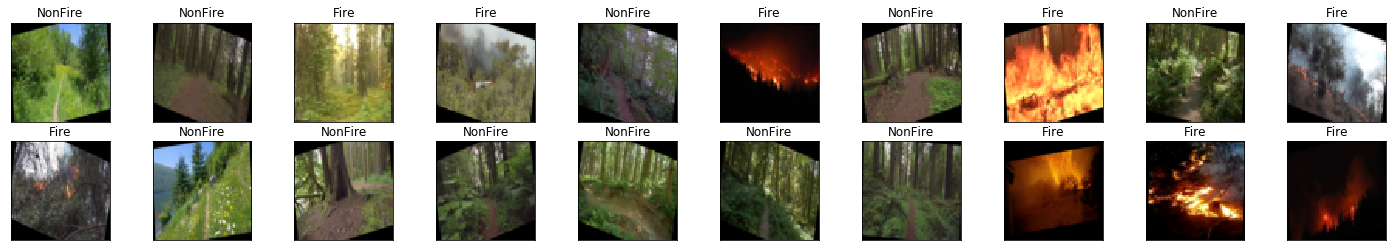

In [0]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

###Models

In [0]:
import torch.nn as nn
import torch.nn.functional as F

####Model 1

In [0]:
# define the CNN architecture
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        # convolutional layer (sees 360x360x3 image tensor)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 32, 3, padding=1)
       
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 12 * 12 -> 4096)
        self.fc1 = nn.Linear(32*4*4, 256)
        
        # linear layer (500 -> 10)
        
        
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,2)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        #print(x.shape)
        # flatten image input
        x = x.view(-1, 32 * 4 * 4)
        #print(x.shape)
        # add dropout layer
        # add 1st hidden layer, with relu activation function
        x = self.dropout(F.relu(self.fc1(x)))
        # add dropout layer
        # add 2nd hidden layer, with relu activation function
        x = self.dropout(F.relu(self.fc2(x)))  
        x = self.dropout(self.fc3(x)) 
        return x

# create a complete CNN
model1 = Model1()
print(model1)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model1.cuda()
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model1.parameters(), lr=0.01)

Model1(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
  (dropout): Dropout(p=0.25)
)


In [0]:
n_epochs = 100
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model1.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model1(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model1.eval()
    for batch_idx, (data, target) in enumerate(valid_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model1(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model1.state_dict(), "/content/forestFire_model1.pt")
        valid_loss_min = valid_loss
    if (valid_loss_min-valid_loss)<-0.05:
      break

Epoch: 1 	Training Loss: 0.470928 	Validation Loss: 0.051766
Validation loss decreased (inf --> 0.051766).  Saving model ...
Epoch: 2 	Training Loss: 0.465739 	Validation Loss: 0.051347
Validation loss decreased (0.051766 --> 0.051347).  Saving model ...
Epoch: 3 	Training Loss: 0.463517 	Validation Loss: 0.051176
Validation loss decreased (0.051347 --> 0.051176).  Saving model ...
Epoch: 4 	Training Loss: 0.462177 	Validation Loss: 0.051070
Validation loss decreased (0.051176 --> 0.051070).  Saving model ...
Epoch: 5 	Training Loss: 0.463690 	Validation Loss: 0.051040
Validation loss decreased (0.051070 --> 0.051040).  Saving model ...
Epoch: 6 	Training Loss: 0.464540 	Validation Loss: 0.051035
Validation loss decreased (0.051040 --> 0.051035).  Saving model ...
Epoch: 7 	Training Loss: 0.461255 	Validation Loss: 0.051004
Validation loss decreased (0.051035 --> 0.051004).  Saving model ...
Epoch: 8 	Training Loss: 0.462309 	Validation Loss: 0.050987
Validation loss decreased (0.05100

In [0]:
model1.load_state_dict(torch.load("/content/forestFire_model1.pt"))
test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))
model1.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model1(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    ct = 0
    for i in range(len(list(target.data))   ):
        try:
            label = target.data[i]
            #print(correct)
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        except IndexError:
            ct+=1
            continue
#print("Problematic Count: %d"%ct)
# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2.2f%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2.2f%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.006584

Test Accuracy of  Fire: 99.52% (208/209)
Test Accuracy of NonFire: 98.30% (463/471)

Test Accuracy (Overall): 98.68% (671/680)


####Model 2

In [0]:
# define the CNN architecture
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        # convolutional layer (sees 360x360x3 image tensor)
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
       
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 12 * 12 -> 4096)
        self.fc1 = nn.Linear(256*4*4, 256)
        
        # linear layer (500 -> 10)
        
        
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,2)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        #print(x.shape)
        # flatten image input
        x = x.view(-1, 256 * 4 * 4)
        #print(x.shape)
        # add dropout layer
        # add 1st hidden layer, with relu activation function
        x = self.dropout(F.relu(self.fc1(x)))
        # add dropout layer
        # add 2nd hidden layer, with relu activation function
        x = self.dropout(F.relu(self.fc2(x)))  
        x = self.dropout(self.fc3(x)) 
        return x

# create a complete CNN
model2 = Model2()
print(model2)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model2.cuda()
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model2.parameters(), lr=0.01)

Model2(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
  (dropout): Dropout(p=0.25)
)


In [0]:
n_epochs = 100
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model2.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model2(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model2.eval()
    for batch_idx, (data, target) in enumerate(valid_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model2(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model2.state_dict(), "/content/forestFire_model2.pt")
        valid_loss_min = valid_loss
    if (valid_loss_min-valid_loss)<-0.05:
      break

Epoch: 1 	Training Loss: 0.481697 	Validation Loss: 0.052395
Validation loss decreased (inf --> 0.052395).  Saving model ...
Epoch: 2 	Training Loss: 0.466182 	Validation Loss: 0.051476
Validation loss decreased (0.052395 --> 0.051476).  Saving model ...
Epoch: 3 	Training Loss: 0.463236 	Validation Loss: 0.051136
Validation loss decreased (0.051476 --> 0.051136).  Saving model ...
Epoch: 4 	Training Loss: 0.461679 	Validation Loss: 0.050919
Validation loss decreased (0.051136 --> 0.050919).  Saving model ...
Epoch: 5 	Training Loss: 0.462751 	Validation Loss: 0.050739
Validation loss decreased (0.050919 --> 0.050739).  Saving model ...
Epoch: 6 	Training Loss: 0.459561 	Validation Loss: 0.050461
Validation loss decreased (0.050739 --> 0.050461).  Saving model ...
Epoch: 7 	Training Loss: 0.457701 	Validation Loss: 0.049940
Validation loss decreased (0.050461 --> 0.049940).  Saving model ...
Epoch: 8 	Training Loss: 0.445930 	Validation Loss: 0.048701
Validation loss decreased (0.04994

In [0]:
model2.load_state_dict(torch.load("/content/forestFire_model2.pt"))
test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))
model2.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model2(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    ct = 0
    for i in range(len(list(target.data))   ):
        try:
            label = target.data[i]
            #print(correct)
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        except IndexError:
            ct+=1
            continue
#print("Problematic Count: %d"%ct)
# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2.2f%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2.2f%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.003025

Test Accuracy of  Fire: 99.04% (207/209)
Test Accuracy of NonFire: 99.79% (470/471)

Test Accuracy (Overall): 99.56% (677/680)


###Transfer Learning

In [0]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

####Dense Net

In [0]:
modelDense =models.densenet121(pretrained=True)
print(modelDense)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:02<00:00, 12968127.23it/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [0]:
for param in modelDense.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(
        OrderedDict([   ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ])
    )
modelDense.classifier = classifier
print(modelDense)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [0]:
optimizer = optim.Adam(modelDense.classifier.parameters(), lr=0.003)
criterion = nn.NLLLoss()
modelDense.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [0]:
n_epochs = 30
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    modelDense.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = modelDense(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    modelDense.eval()
    for batch_idx, (data, target) in enumerate(valid_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = modelDense(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(modelDense.state_dict(), "/content/modelDense.pt")
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.205904 	Validation Loss: 0.005624
Validation loss decreased (inf --> 0.005624).  Saving model ...
Epoch: 2 	Training Loss: 0.072431 	Validation Loss: 0.003142
Validation loss decreased (0.005624 --> 0.003142).  Saving model ...
Epoch: 3 	Training Loss: 0.053387 	Validation Loss: 0.001342
Validation loss decreased (0.003142 --> 0.001342).  Saving model ...
Epoch: 4 	Training Loss: 0.055230 	Validation Loss: 0.001629
Epoch: 5 	Training Loss: 0.047254 	Validation Loss: 0.001527
Epoch: 6 	Training Loss: 0.036156 	Validation Loss: 0.001514
Epoch: 7 	Training Loss: 0.030052 	Validation Loss: 0.001250
Validation loss decreased (0.001342 --> 0.001250).  Saving model ...
Epoch: 8 	Training Loss: 0.027822 	Validation Loss: 0.001512
Epoch: 9 	Training Loss: 0.018711 	Validation Loss: 0.001080
Validation loss decreased (0.001250 --> 0.001080).  Saving model ...
Epoch: 10 	Training Loss: 0.036033 	Validation Loss: 0.000929
Validation loss decreased (0.001080 --> 0.000929)

In [0]:
modelDense.load_state_dict(torch.load("/content/modelDense.pt"))
test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))
modelDense.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = modelDense(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    ct = 0
    for i in range(len(list(target.data))   ):
        try:
            label = target.data[i]
            #print(correct)
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        except IndexError:
            ct+=1
            continue
#print("Problematic Count: %d"%ct)
# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.002044

Test Accuracy of  Fire: 100% (209/209)
Test Accuracy of NonFire: 99% (468/471)

Test Accuracy (Overall): 99% (677/680)


####VGG

In [0]:
modelVgg16 = models.vgg16(pretrained=True)
print(modelVgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 106560358.98it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
for param in modelVgg16.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(
        OrderedDict([   ('fc1', nn.Linear(25088, 4096)),
                          ('relu', nn.ReLU()),
                     ('fc2', nn.Linear(4096, 2048)),
                          ('relu', nn.ReLU()),
                     ('fc3', nn.Linear(2048, 1024)),
                          ('relu', nn.ReLU()),
                     ('fc4', nn.Linear(1024, 512)),
                          ('relu', nn.ReLU()),
                     ('fc5', nn.Linear(512, 256)),
                          ('relu', nn.ReLU()),
                     ('fc6', nn.Linear(256, 128)),
                          ('relu', nn.ReLU()),
                     ('fc7', nn.Linear(128, 64)),
                          ('relu', nn.ReLU()),
                     ('fc8', nn.Linear(64, 2)),
                          ('output', nn.LogSoftmax(dim=1))
                          ])
    )
modelVgg16.classifier = classifier
print(modelVgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
optimizer = optim.Adam(modelVgg16.classifier.parameters(), lr=0.003)
criterion = nn.NLLLoss()
modelVgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
n_epochs = 30
valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    modelVgg16.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = modelVgg16(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    modelVgg16.eval()
    for batch_idx, (data, target) in enumerate(valid_loader):
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = modelVgg16(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(modelVgg16.state_dict(), "/content/modelVgg.pt")
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 18.994959 	Validation Loss: 2.109011
Validation loss decreased (inf --> 2.109011).  Saving model ...
Epoch: 2 	Training Loss: 2753.949374 	Validation Loss: 7069.455699
Epoch: 3 	Training Loss: 11523.643029 	Validation Loss: 46.234961
Epoch: 4 	Training Loss: 234.477861 	Validation Loss: 23.187726
Epoch: 5 	Training Loss: 95.926457 	Validation Loss: 7.019265
Epoch: 6 	Training Loss: 25.432103 	Validation Loss: 6.778491
Epoch: 7 	Training Loss: 19.934741 	Validation Loss: 6.063599
Epoch: 8 	Training Loss: 14.033932 	Validation Loss: 0.261518
Validation loss decreased (2.109011 --> 0.261518).  Saving model ...
Epoch: 9 	Training Loss: 6.883884 	Validation Loss: 3.778053
Epoch: 10 	Training Loss: 7.834057 	Validation Loss: 2.489324
Epoch: 11 	Training Loss: 14.228343 	Validation Loss: 1.484808
Epoch: 12 	Training Loss: 10.903170 	Validation Loss: 1.987213
Epoch: 13 	Training Loss: 5.877052 	Validation Loss: 2.418203
Epoch: 14 	Training Loss: 7.748700 	Validation Lo

In [0]:
modelVgg16.load_state_dict(torch.load("/content/modelVgg.pt"))
test_loss = 0.0
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))
modelVgg16.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = modelVgg16(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    ct = 0
    for i in range(len(list(target.data))   ):
        try:
            label = target.data[i]
            #print(correct)
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        except IndexError:
            ct+=1
            continue
#print("Problematic Count: %d"%ct)
# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(len(classes)):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.268218

Test Accuracy of  Fire: 95% (195/205)
Test Accuracy of NonFire: 99% (472/475)

Test Accuracy (Overall): 98% (667/680)
